In [3]:
# from https://bettercoding404.github.io/xgboost-python

import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [7]:
# 加载数据集
iris = load_iris()
X = iris.data
y = iris.target

import pandas as pd
import matplotlib.pyplot as plt
iris_df = pd.DataFrame(
    data=iris.data,  # 特征数据（花萼长度、宽度等4个特征）
    columns=iris.feature_names  # 特征列名
)

# 添加标签列：数字编码（0,1,2）和对应的物种名称
iris_df['target'] = iris.target  # 数字标签
iris_df['species'] = iris.target_names[iris.target]  # 物种名称（直接通过索引匹配）




sepal length (cm)       Axes(0.125,0.653529;0.352273x0.226471)
sepal width (cm)     Axes(0.547727,0.653529;0.352273x0.226471)
petal length (cm)       Axes(0.125,0.381765;0.352273x0.226471)
petal width (cm)     Axes(0.547727,0.381765;0.352273x0.226471)
target                      Axes(0.125,0.11;0.352273x0.226471)
dtype: object

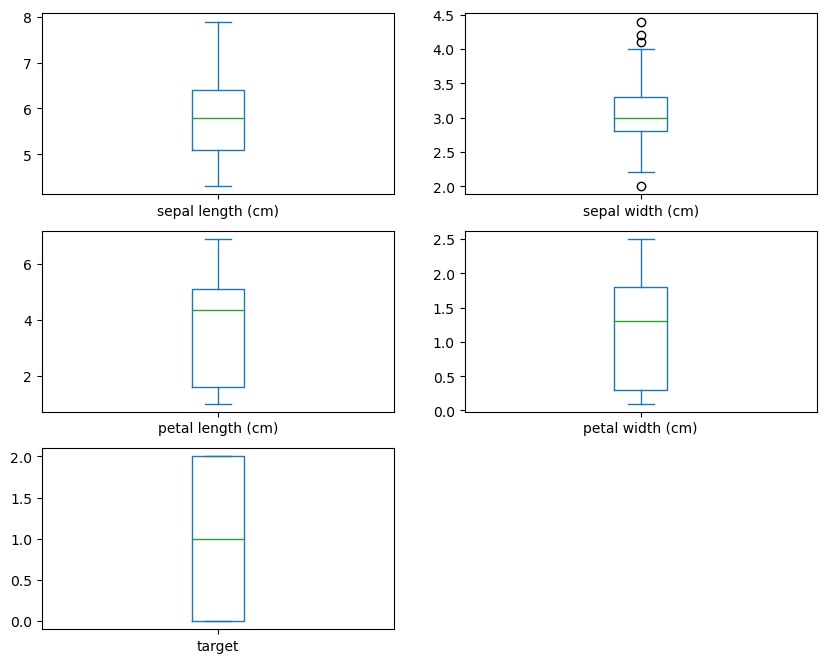

In [10]:
iris_df.plot(
    kind='box', 
    subplots=True, 
    layout=(3, 2),  # 调整为3行2列
    sharex=False, 
    sharey=False,
    figsize=(10, 8)  # 适当调整图形大小
)


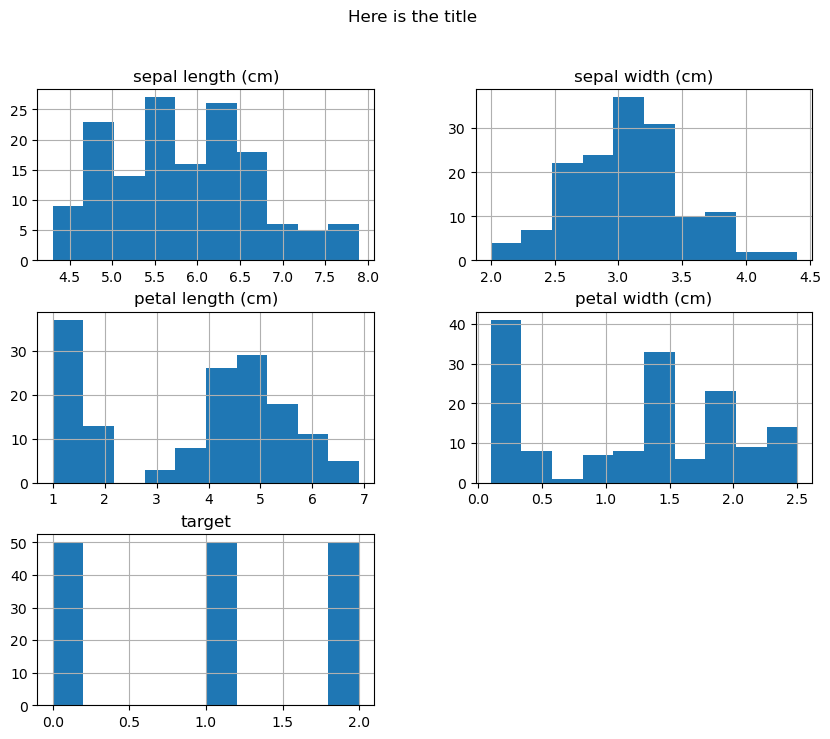

<Axes: >

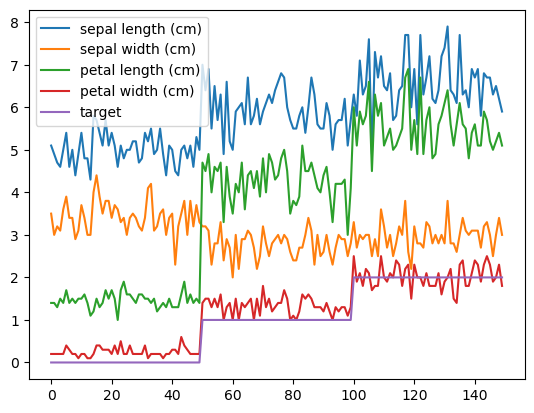

In [26]:
import matplotlib.pyplot as plt  # 画图的库

iris_df.hist(figsize=(10, 8))
plt.suptitle('Here is the title')  # 加个总标题
plt.show()



<Axes: ylabel='Density'>

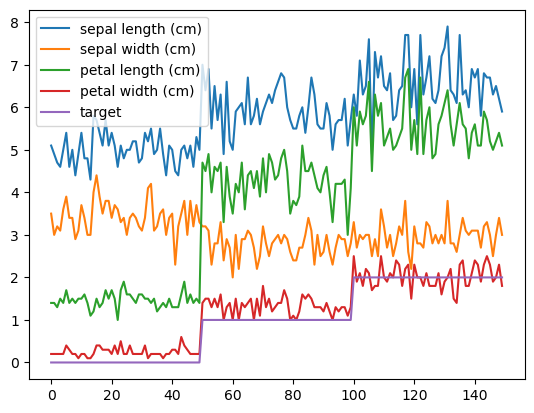

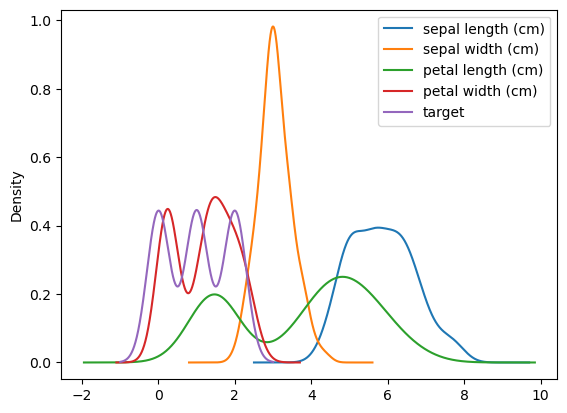

In [28]:
iris_df.plot()
iris_df.plot(kind='kde')

In [6]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 转化为 XGBoost 的数据格式
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test)

In [8]:
# 设置参数
params = {
    'objective': 'multi:softmax',
    'num_class': 3
}

# 训练模型
num_rounds = 50
model = xgb.train(params, dtrain, num_rounds)

# 预测
y_pred = model.predict(dtest)

# 评估
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0
